In [5]:
%matplotlib notebook
# 导入相关库
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

In [6]:
# 定义运算的函数
def to_follow():
    sum_i = np.array([0, 0], dtype='float64')
    for j in range(n):
        r = 5  # 期望间距
        ri = np.array([(i - j) * r, 0])
        part1 = A[i][j] * ((X[i] - X[j] - ri) + c1 * (V[i] - V[j]))  # (1, 2)
        sum_i += part1
    return sum_i


def to_leader():
    rl = np.array([(n - i) * (-5), 0], dtype='float64')
    part2 = K[i][i] * ((X[i] - xl - rl) + c2 * (V[i] - vl))
    return part2


def animate(a=int):  # 绘图
    plt.cla()
    plt.subplots_adjust(bottom=0.2, top=0.9)
    plt.xlim((0, 100))
    plt.ylim((10, 80))
    plt.xlabel('X Position(m)')
    plt.ylabel('Y Position(m)')
    plt.tight_layout()
    for t1 in range(4):
        plt.plot(data[:a, t1, 0], data[:a, t1, 1], c=colors[t1], label=labels[t1])
        plt.plot(data[a, t1, 0], data[a, t1, 1], '>', c=colors[t1], markersize=8)
    # plt.legend(loc='bottom right')

In [7]:
# 定义所需参数
n = 3  # 跟随节点个数
c1 = c2 = 1  # 超参β和γ
A = np.ones((n, n))  # 邻接矩阵
A[0, 1]=A[1, 0] = 0
A[0, 2]=A[2, 0] = 0  # 定义未连通矩阵
X = np.array([[6.0, 60.0], [10.0, 40.0], [16.0, 70.0]])  # 初位置
V = np.array([[10.0, 5.0], [8.0, 4.0], [9.0, 3.0]])  # 初速度

K = np.diag((0, 1, 1))*5  # 与leader的连接矩阵
xl = np.array([20.0, 50.0])  # leader的初始位置
vl = np.array([6.0, 0])  # leader的初始速度

step = 1e-1  # 步长

In [8]:
# 反馈控制算法部分
data = [np.vstack((X, xl))]
for t in np.arange(0, 12, step):
    dV = []  # 装同一时刻的速度变化量
    for i in range(n):
        dv_i = np.zeros((1, 2)) - to_follow() - to_leader()
        dV.append(dv_i[0])
    xl += vl * step  # leader的位置变化
    V += np.array(dV) * step  # follower的速度变化
    X += V * step  # follower的位置变化
    data.append(np.vstack((X, xl)))
data = np.array(data)

<IPython.core.display.Javascript object>


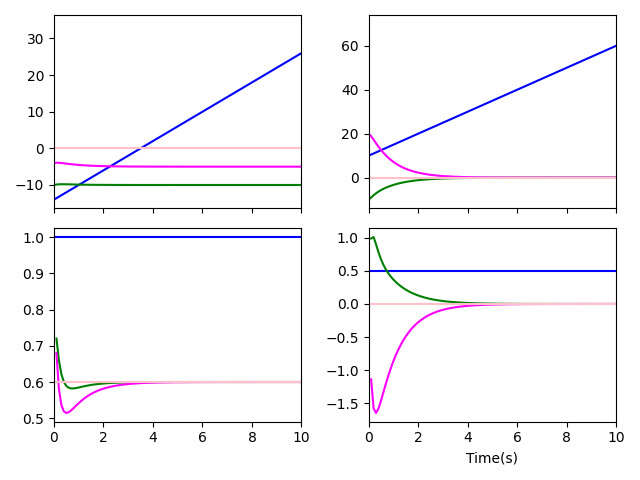

In [9]:
colors = ['blue', 'green', 'fuchsia', 'pink']
labels = ['Vehicle i', 'Vehicle i+1', 'Vehicle i+2', 'Leader']

X = [i * step for i in range(data.shape[0])]
Y1 = data[:, :, 0] - data[:, 3, 0].reshape(-1, 1)
Y2 = data[:, :, 1] - data[:, 3, 1].reshape(-1, 1)
Y3 = data[1:, :, 0] - data[:-1, :, 0]
Y4 = data[1:, :, 1] - data[:-1, :, 1]

fig2, ax = plt.subplots(2, 2, sharex='all')
plt.xlim((0, 10))
plt.xlabel('Time(s)')
ax1 = ax[0, 0]
ax2 = ax[0, 1]
ax3 = ax[1, 0]
ax4 = ax[1, 1]
for i in range(4):
    ax1.plot(X, Y1[:,i], c=colors[i])
    ax2.plot(X, Y2[:,i], c=colors[i])
    ax3.plot(X[1:], Y3[:,i], c=colors[i])
    ax4.plot(X[1:], Y4[:,i], c=colors[i])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


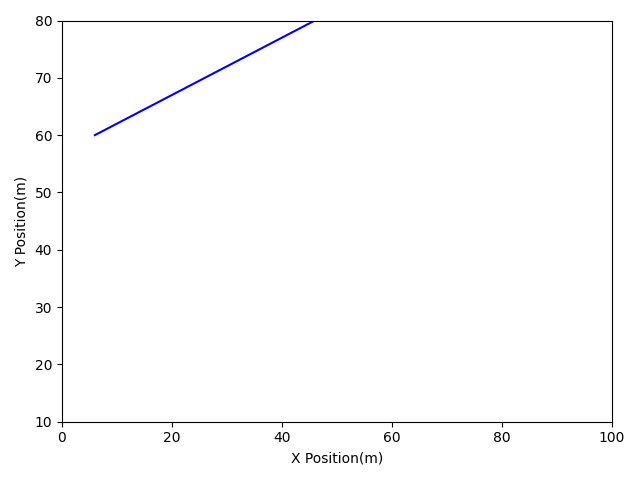

In [11]:
# 绘图
fig1 = plt.figure()
plt.subplots_adjust(bottom=0.2, top=0.9)
plt.xlabel('X Position(m)')
plt.ylabel('Y Position(m)')

# for i in range(4):
#     plt.plot(data[:, i, 0], data[:, i, 1], colors[i])
ani = FuncAnimation(fig1, animate, interval=10)
ani.save('Not Connect.gif', writer='pillow')
plt.show()